## Types of Clustering
There are many types of clustering algorithms of which here are the top 4 well-known ones:

* Connectivity-based Clustering
* Centroid-based Clustering
* Distribution-based Clustering
* Density-based Clustering

### Clustering Principles:
All clustering algorithms try to group data points based on similarities between the data. What does this actually mean?


It is often spoken of, in terms of **`inter-cluster heterogeneity`** and **`intra-cluster homogeneity`**. 

* `Inter-cluster heterogeneity`<br> This means that the clusters are as different from one another as possible. The characteristics of one cluster are very different from another cluster. This makes the clusters very stable and reliable.
* `Intra-cluster homogeneity`<br> This talks about how similar are the characteristics of all the data within the cluster. The more similar, the more cohesive is the cluster and hence more stable. 

* **Hence the objective of clustering is to maximise the inter-cluster distance (Inter-cluster heterogeneity) and minimise the intra-cluster distance (intra-cluster homogeneity )**


In [36]:
import requests
from time import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans
from sklearn.datasets import make_blobs

## Mean-Shift clustering algorithm

#### Two problems with Kmeans 
* We have to specify the number of clusters `k`.
* Sensitive to centroid initialization.

#### Mean Shift mitigates these two problems
* The idea is to find modes of a distribution or a probability density.
    * The modes are the peaks
* <div style='color:green'>The assumption is you have a set of instances drawn from a probabilty density function and you want to find the mode</div>

#### Lets understand the how mean-shift works 
* This datapoints are drawn from a PDF
* Where is the mode / peak ?
* Mean-shift will find the peak

<img src='./Notes/mean-shift-1.png'> 

#### Lets pick a region of interest  & Repeat step 1 & 2 until convergence 

<img src='./Notes/mean-shift-2.png'>

#### Step: 1 Considering all the points inside the region, find the mean of the region

<img src='./Notes/mean-shift-3.png'>

#### Step: 2 Shift to the new mean 

<img src='./Notes/mean-shift-4.png'>

<a href='https://youtu.be/TMPEujQrY70'>Video : Mean Shift in Space | Udacity course "Introduction to Computer Vision"</a>


#### Mean shift Clustering algorithm
* Simple but computationaly expensive
* Finds arbitary number of clusters
* No initialization required
* Robust to outliers
* Clustering depends on window size `w`

In [20]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

plt.scatter(X[:, 0], X[:, 1], s=2);
plt.title('DATA');

<img src='./plots/Data.png'>

## 

## How to we set the bandwidth ?

In [ ]:
meanshift = MeanShift(bandwidth=0.01, bin_seeding=True).fit(X)
plt.scatter(X[:, 0], X[:, 1], s=2, c=meanshift.labels_);
plt.title(f'Clusters found : {meanshift.cluster_centers_.shape[0]}');

<img src='./plots/bandwidth-0.01.png'>

In [ ]:
meanshift = MeanShift(bandwidth=0.1, bin_seeding=True).fit(X)
plt.scatter(X[:, 0], X[:, 1], s=2, c=meanshift.labels_);
plt.title(f'Clusters found : {meanshift.cluster_centers_.shape[0]}');

<img src='./plots/bandwidth-0.1.png'>

In [ ]:
meanshift = MeanShift(bandwidth=0.5, bin_seeding=True).fit(X)
plt.scatter(X[:, 0], X[:, 1], s=2, c=meanshift.labels_);
plt.title(f'Clusters found : {meanshift.cluster_centers_.shape[0]}');

<img src='./plots/bandwidth-0.5.png'>

In [ ]:
meanshift = MeanShift(bandwidth=0.7, bin_seeding=True).fit(X)
plt.scatter(X[:, 0], X[:, 1], s=2, c=meanshift.labels_);
plt.title(f'Clusters found : {meanshift.cluster_centers_.shape[0]}');

<img src='./plots/bandwidth-0.7.png'>

### Mean shift

* bandwidth <br>
Bandwidth used in the RBF kernel.
    * If not given, the bandwidth is estimated using `sklearn.cluster.estimate_bandwidth`
    * `sklearn.cluster.estimate_bandwidth` : Estimate the bandwidth to use with the mean-shift algorithm.
    * <div style='color:salmon'>This function takes time at least quadratic in n_samples. For large datasets, it’s wise to set this parameter to a small value.</div>

<br>

* seeds 
    * shape : (n_samples, n_features)
    * Seeds used to initialize kernels. 
    * If not set, the seeds are calculated by `clustering.get_bin_seeds` with bandwidth as the grid size and default values for other parameters.

<br>

* bin_seeding
    * The default value is False. Ignored if `seeds` argument is not None.
    * If true, initial kernel locations are not locations of all points, but rather the location of the discretized version of points, where points are binned onto a grid whose coarseness corresponds to the bandwidth. 
    * <div style='color:green'>Setting this option to True will speed up the algorithm because fewer seeds will be initialized.</div> 
    
<br>

* min_bin_freq
    * default=1
    * To speed up the algorithm, accept only those bins with at least `min_bin_freq` points as seeds.
    
<br>

* cluster_all
    * default=True
    * If true, then all points are clustered, even those orphans that are not within any kernel.
    * If true, Orphans are assigned to the nearest kernel. 
    * If false, then orphans are given cluster label -1.

<br>

* <div style='color:salmon'>Scalability can be boosted by using fewer seeds, for example by using a higher value of `min_bin_freq` in the `get_bin_seeds` function.</div>

* <div style='color:salmon'>Note that the `estimate_bandwidth` function is much less scalable than the mean shift algorithm and will be the bottleneck if it is used.</div>

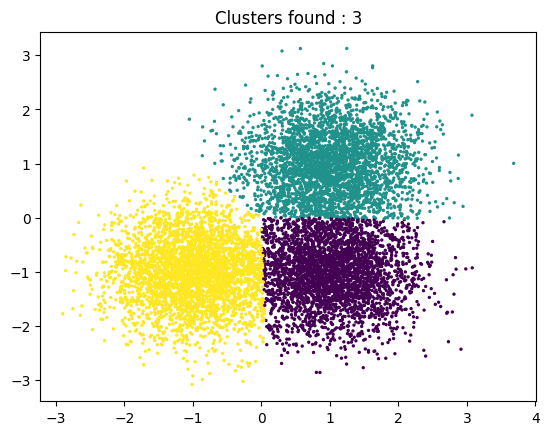

In [34]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=300)

meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X)

plt.scatter(X[:, 0], X[:, 1], s=2, c=meanshift.labels_);
plt.title(f'Clusters found : {meanshift.cluster_centers_.shape[0]}');

In [69]:
# https://unsplash.com/@donnaliao
url = 'https://images.unsplash.com/photo-1673591296410-1220ba8d6c0f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=725&q=80'

# download the image
img_path = tf.keras.utils.get_file(origin=url)
# read the image
img_raw = tf.io.read_file(filename=img_path)
# decode JPG
img_jpg = tf.image.decode_jpeg(contents=img_raw, channels=3)
# plot the image
plt.imshow(img_jpg);
plt.title(f'image shape : {img_jpg.shape}');

<img src='./plots/original-image.png'>

In [58]:
# plot utility

def visualize_segmentation(model, title, time_cost):
    img_cluster = model.cluster_centers_[model.labels_]
    img_cluster = np.reshape(img_cluster, newshape=img_jpg.shape)
    img_cluster = tf.cast(img_cluster, dtype=tf.uint8)

    plt.figure(figsize=(20,20))
    plt.subplot(121)
    plt.imshow(img_jpg)
    plt.title('Original Image')
    plt.subplot(122)
    plt.imshow(img_cluster)
    plt.title(title)
    plt.tight_layout()

### Let's use `kmeans` clustering algorithm for image Segmentation

In [29]:
img_arr = img_jpg.numpy()
img_arr = np.reshape(img_arr, newshape=(-1,3))
print('Shape of image array :',img_arr.shape)

Shape of image array : (420500, 3)


In [70]:
t0 = time()
kmeans = KMeans(n_clusters=7, n_init='auto', random_state=42).fit(img_arr)
time_cost = time() - t0

title = f'Image Segments by Kmeans | n_cluster=7 | time cost :{time_cost :0.2f}seconds '

visualize_segmentation(kmeans, title, time_cost)

<img src='./plots/kmeans-image-segments.png'>

### Let's use `mean shift` clustering algorithm for image Segmentation 
* <div style='color:red'>Mean-shift is Computationaly expensive</div>

In [52]:
t0 = time()
# This function takes time at least quadratic in n_samples.
# For large datasets, it’s wise to set this parameter to a small value.
# bandwidth = estimate_bandwidth(X=img_arr, quantile=0.5, n_samples=10000)
meanshift = MeanShift(bandwidth=0.7, bin_seeding=True).fit(img_arr)
time_cost = time() - t0

In [71]:

title = f'Image Segments by MeanShift | bandwidth=0.7 | time cost : {time_cost/60 :0.2f}minutes '

visualize_segmentation(kmeans, title, time_cost)

<img src='./plots/meanshift-image-segments.png'>